<a href="https://colab.research.google.com/github/asegura4488/MetodosComputacionales1/blob/main/Semana9/GradienteLineal2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

In [9]:
G = (lambda x,y: x**3 - 3*x*y - 1, \
     lambda x,y: 3*x**2*y -y**3)

In [23]:
def GetVectorF(G,r):

    v = np.zeros(len(G))
    for i in range(v.shape[0]):
        v[i] = G[i](r[0],r[1])

    return v

In [24]:
GetVectorF(G,np.array([1,0]))

array([0., 0.])

In [25]:
def GetJacobian(G,r,h=1e-4):

    J = np.zeros((r.shape[0],r.shape[0]))

    for i in range(r.shape[0]):
        J[i,0] = (G[i](r[0]+h,r[1]) - G[i](r[0]-h,r[1]))/(2*h)
        J[i,1] = (G[i](r[0],r[1]+h) - G[i](r[0],r[1]-h))/(2*h)


    return J

In [26]:
GetJacobian(G,np.array([1,2]))

array([[-2.99999999, -3.        ],
       [12.        , -9.00000001]])

In [27]:
def Metric(G,r):
  return 0.5*np.linalg.norm(GetVectorF(G,r))

In [28]:
Metric(G,np.array([1,0]))

np.float64(0.0)

In [17]:
def GetFig(R,W,it):

  fig = plt.figure(figsize=(6,4))
  ax = fig.add_subplot(1,2,1)
  ax1 = fig.add_subplot(1,2,2)

  ax.plot(R[:it])
  ax1.plot(W[:it])

  return ax,ax1

(<Axes: >, <Axes: >)

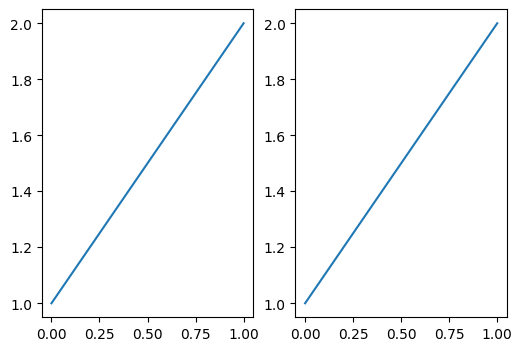

In [18]:
GetFig(np.array([1,2]),np.array([1,2]),2)

In [29]:
def Minimizer(G,r,lr=0.01,epochs=int(1e3),error=1e-4):

  metric = 1
  it = 0

  R = np.array([r])
  M = np.array([])

  while metric > error and it < epochs:

    # Metric
    M = np.append(M,Metric(G,r))

    # Gradient
    J = GetJacobian(G,r)
    Vector = GetVectorF(G,r)

    # Gradient descent
    r -= lr*np.dot(J.T,Vector)
    #print(R)

    R = np.vstack((R,r))


    clear_output(wait=True)
    ax,ax1 = GetFig(R,M,it)

    plt.show()

    it += 1

  return r





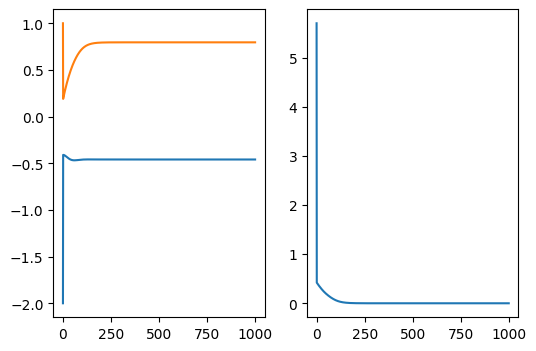

In [31]:
xsol = Minimizer(G,np.array([-2.,1.]))